# Data Science - Final Test
___
## Nadhifa Sofia | 19/448721/PPA/05804
___

Use the dataset in the following [link](https://github.com/graphql-compose/graphql-compose-examples/tree/master/examples/northwind/data/csv) to answer the problem:

Apply the Apriori algorithm to the dataset at the link above and identify the frequent k-itemset. Determine the 
minimum support, confidence and lift for the test you are doing and provide an analysis of the results found. Things that need to be done include:
- Make a problem-solving analysis of the case.
- Preprocess existing data that you think is needed.
- Evaluate the resulting model.
- Write down each stage in order and clearly.

# Implementing market basket analysis
___
Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

Based on the concept of strong rules, Rakesh Agrawal, Tomasz Imieliński and Arun Swami introduced association rules for discovering regularities between products in large-scale transaction data recorded by point-of-sale (POS) systems in supermarkets. For example, the rule {X,Y} -> {Z} found in the sales data of a market would indicate that if a customer buys X and Y together, they are likely to also buy Z. Such information can be used as the basis for decisions about marketing activities such as, e.g., promotional pricing or product placements.
___

**1. Make a problem-solving analysis of the case.**

In this project, I want to analyze what product will be ordered by the customers from some support, confidence, lift values. For some reasons, I want to see can the discount product influence the customer to order more? So that, I can arrange my future campaign marketing from certain products.

In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Association Rule Mining is one of the ways to find patterns in data. It finds:
- features (dimensions) which occur together
- features (dimensions) which are “correlated”

What does the value of one feature tell us about the value of another feature? 
___
For example, people who buy Chef Anton's Cajun Seasonings are likely to buy Tofu. Or we can rephrase the statement by saying: If (people buy Chef Anton's Cajun Seasonings), then (they buy Tofu). Note the if, then rule. This does not necessarily mean that if people buy Chef Anton's Cajun Seasoning, they buy Tofu. In General, we can say that if condition A tends to B it does not necessarily mean that B tends to A.
From larger datasets (transactions), it will lead to have a proper **association rule**.
___

Datasets in github are separated through csv files. The first step that I did : join the [order_details](https://github.com/graphql-compose/graphql-compose-examples/blob/master/examples/northwind/data/csv/order_details.csv) and [products](https://github.com/graphql-compose/graphql-compose-examples/blob/master/examples/northwind/data/csv/products.csv) to complete each other by using pandas dataframe. This .ipynb will not require the memory since it can be run on cloud like Google Colab.

In [2]:
# Reading my UAS Dataset from Github (https://github.com/graphql-compose/graphql-compose-examples/blob/master/examples/northwind/data/csv/orders.csv)

data1 = pd.read_csv('https://raw.githubusercontent.com/graphql-compose/graphql-compose-examples/master/examples/northwind/data/csv/order_details.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/graphql-compose/graphql-compose-examples/master/examples/northwind/data/csv/products.csv')
retaildata = pd.merge(data1, data2, on='productID')
retaildata.head()

,orderID,productID,unitPrice_x,quantity,discount,productName,supplierID,categoryID,quantityPerUnit,unitPrice_y,unitsInStock,unitsOnOrder,reorderLevel,discontinued
0,10248,11,14.0,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
1,10296,11,16.8,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
2,10327,11,16.8,50,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
3,10353,11,16.8,12,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
4,10365,11,16.8,24,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0


# Do some Exploratory Data Analysis (EDA)

I did some Exploratory Data Analysis as most Data Scientist did to summarize main characteristics from datasets, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [3]:
retaildata.describe()

,orderID,productID,unitPrice_x,quantity,discount,supplierID,categoryID,unitPrice_y,unitsInStock,unitsOnOrder,reorderLevel,discontinued
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167,14.488167,4.135499,27.948687,39.795824,8.074246,11.900232,0.105800
std,241.378032,22.159019,29.827418,19.022047,0.083450,8.228640,2.378567,31.610706,36.055668,19.748983,10.791421,0.307653
min,10248.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000,7.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.000000
max,11077.000000,77.000000,263.500000,130.000000,0.250000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


In [4]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderID          2155 non-null   int64  
 1   productID        2155 non-null   int64  
 2   unitPrice_x      2155 non-null   float64
 3   quantity         2155 non-null   int64  
 4   discount         2155 non-null   float64
 5   productName      2155 non-null   object 
 6   supplierID       2155 non-null   int64  
 7   categoryID       2155 non-null   int64  
 8   quantityPerUnit  2155 non-null   object 
 9   unitPrice_y      2155 non-null   float64
 10  unitsInStock     2155 non-null   int64  
 11  unitsOnOrder     2155 non-null   int64  
 12  reorderLevel     2155 non-null   int64  
 13  discontinued     2155 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 252.5+ KB


,orderID,productID,unitPrice_x,quantity,discount,supplierID,categoryID,unitPrice_y,unitsInStock,unitsOnOrder,reorderLevel,discontinued
orderID,1.000000,-0.057118,0.061743,-0.016260,-0.002041,-0.027264,-0.000129,-0.007334,0.020603,-0.005987,0.023311,-0.016878
productID,-0.057118,1.000000,-0.019956,0.011932,-0.037659,0.590308,-0.097398,-0.016404,0.151705,-0.079977,0.110891,-0.180518
unitPrice_x,0.061743,-0.019956,1.000000,0.007366,-0.011166,0.106456,-0.008698,0.991273,-0.174785,-0.115969,-0.150803,0.134009
quantity,-0.016260,0.011932,0.007366,1.000000,0.128577,0.030246,-0.014338,0.011677,0.016473,0.035448,0.008573,-0.010183
discount,-0.002041,-0.037659,-0.011166,0.128577,1.000000,-0.008348,-0.009170,-0.009493,-0.003835,0.010167,0.017835,-0.004631
supplierID,-0.027264,0.590308,0.106456,0.030246,-0.008348,1.000000,0.160428,0.108567,0.186493,-0.152965,0.056547,-0.072309
categoryID,-0.000129,-0.097398,-0.008698,-0.014338,-0.009170,0.160428,1.000000,-0.010472,0.082043,-0.076176,-0.134834,0.084445
unitPrice_y,-0.007334,-0.016404,0.991273,0.011677,-0.009493,0.108567,-0.010472,1.000000,-0.177929,-0.115608,-0.152413,0.136948
unitsInStock,0.020603,0.151705,-0.174785,0.016473,-0.003835,0.186493,0.082043,-0.177929,1.000000,-0.331962,0.246886,-0.262432
unitsOnOrder,-0.005987,-0.079977,-0.115969,0.035448,0.010167,-0.152965,-0.076176,-0.115608,-0.331962,1.000000,0.361687,-0.140665


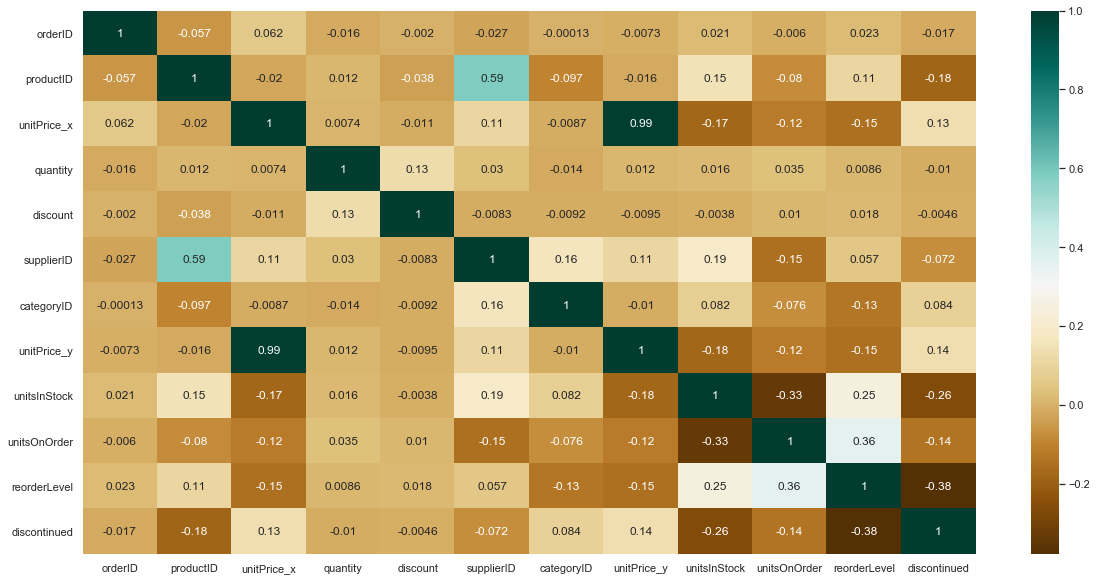

In [5]:
# To see every variables' correlation with HeatMap Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

plt.figure(figsize=(20,10))
c= retaildata.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [9]:
retaildata.shape

(2155, 14)

# Data Preprocessing
___
**2. Preprocess existing data that you think is needed.**
- Remove spaces on productName from beginning and end of the product attributes
- Remove the redundance data from orderID since we want to list the unique value of it (no duplicates)
- Convert the orderID into string, so the algorithm will understand it

In [6]:
# Data Preparation
retaildata['productName'] = retaildata['productName'].str.strip()  # Remove spaces from beginning & end
retaildata.dropna(axis=0, subset=['orderID'], inplace=True)  # Remove duplicated order id
retaildata['orderID'] = retaildata['orderID'].astype('str')  # Convert order id -> string so algorithm will understand it
retaildata.head() 

,orderID,productID,unitPrice_x,quantity,discount,productName,supplierID,categoryID,quantityPerUnit,unitPrice_y,unitsInStock,unitsOnOrder,reorderLevel,discontinued
0,10248,11,14.0,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
1,10296,11,16.8,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
2,10327,11,16.8,50,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
3,10353,11,16.8,12,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
4,10365,11,16.8,24,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0


In [7]:
# Check again the orderID data types
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderID          2155 non-null   object 
 1   productID        2155 non-null   int64  
 2   unitPrice_x      2155 non-null   float64
 3   quantity         2155 non-null   int64  
 4   discount         2155 non-null   float64
 5   productName      2155 non-null   object 
 6   supplierID       2155 non-null   int64  
 7   categoryID       2155 non-null   int64  
 8   quantityPerUnit  2155 non-null   object 
 9   unitPrice_y      2155 non-null   float64
 10  unitsInStock     2155 non-null   int64  
 11  unitsOnOrder     2155 non-null   int64  
 12  reorderLevel     2155 non-null   int64  
 13  discontinued     2155 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 252.5+ KB


As we want to analyze from discount products, so we count all of the data with its discount 

In [8]:
retaildata['discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.06       1
0.04       1
Name: discount, dtype: int64

In [11]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
# Run market basket analysis to certain country, to avoid computationally expensive
# Create basket transactions
basket = (retaildata[retaildata['discount'] == 0.25]
          .groupby(['orderID', 'productName'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('orderID'))

In [13]:
basket.head()

productName,Alice Mutton,Boston Crab Meat,Camembert Pierrot,Carnarvon Tigers,Chai,Chang,Chartreuse verte,Chef Anton's Cajun Seasoning,Chef Anton's Gumbo Mix,Côte de Blaye,...,Steeleye Stout,Tarte au sucre,Teatime Chocolate Biscuits,Thüringer Rostbratwurst,Tofu,Tourtière,Tunnbröd,Vegie-spread,Wimmers gute Semmelknödel,Zaanse koeken
orderID,,,,,,,,,,,,,,,,,,,,,
10260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10279,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10284,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can use Association Rules in any dataset where features take only two values i.e., 0/1. 
Some examples are listed below:
- Market Basket Analysis is a popular application of Association Rules.
- People who buy Chef Anton's Cajun Seasoning are likely to buy Tofu
- People who buy with price 0.25% off (like me who loves discount)

In [14]:
# Converting all positive vaues to 1 and everything else to 0, so that the apriori algorithm can work
def my_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(my_encoding)

# Training Model
___
## Support
Support is an indication of how frequently the itemset appears in the dataset.
The support of X with respect to T is defined as the proportion of transactions t in the dataset which contains the itemset X. 

supp(X) = |{t element T; X contains t}| / |T|
___
You can see the explanation from this [url.](https://en.wikipedia.org/wiki/Association_rule_learning)

In [15]:
# Generatig frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [16]:
frequent_itemsets.head()

,support,itemsets
0,0.069444,(Alice Mutton)
1,0.013889,(Boston Crab Meat)
2,0.069444,(Camembert Pierrot)
3,0.041667,(Carnarvon Tigers)
4,0.069444,(Chai)


## Confidence
Confidence is an indication of how often the rule has been found to be true.

The confidence value of a rule, X -> Y , with respect to a set of transactions T, is the proportion of the transactions that contains X which also contains Y.
___
Confidence is defined as:

conf(X -> Y) = supp(X U Y) / supp(X)
___
supp(X U Y) means the support of the union of the items in X and Y. This is somewhat confusing since we normally think in terms of probabilities of events and not sets of items. 


## Lift
Lift is a measure of the performance of a targeting model (association rule) at predicting or classifying cases as having an enhanced response (with respect to the population as a whole), measured against a random choice targeting model. A targeting model is doing a good job if the response within the target is much better than the average for the population as a whole. Lift is simply the ratio of these values: target response divided by average response.

For example, suppose a population has an average response rate of 5%, but a certain model (or rule) has identified a segment with a response rate of 20%. Then that segment would have a lift of 4.0 (20%/5%).

In [17]:
# Generating rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

In [18]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Boston Crab Meat),(Alice Mutton),0.013889,0.069444,0.013889,1.000000,14.4,0.012924,inf
1,(Alice Mutton),(Boston Crab Meat),0.069444,0.013889,0.013889,0.200000,14.4,0.012924,1.232639
2,(Chang),(Alice Mutton),0.083333,0.069444,0.013889,0.166667,2.4,0.008102,1.116667
3,(Alice Mutton),(Chang),0.069444,0.083333,0.013889,0.200000,2.4,0.008102,1.145833
4,(Escargots de Bourgogne),(Alice Mutton),0.027778,0.069444,0.013889,0.500000,7.2,0.011960,1.861111


# Making reecommendations

In [19]:
basket_sets["Chef Anton's Cajun Seasoning"].sum()

2

In [20]:
basket_sets['Tofu'].sum()

2

In [21]:
# See the apriori algorithm by using certain parameters
rules[ (rules['lift'] >= 3) &
      (rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Boston Crab Meat),(Alice Mutton),0.013889,0.069444,0.013889,1.0,14.4,0.012924,inf
4,(Escargots de Bourgogne),(Alice Mutton),0.027778,0.069444,0.013889,0.5,7.2,0.011960,1.861111
10,(Zaanse koeken),(Alice Mutton),0.055556,0.069444,0.027778,0.5,7.2,0.023920,1.861111
11,(Alice Mutton),(Zaanse koeken),0.069444,0.055556,0.027778,0.4,7.2,0.023920,1.574074
13,(Boston Crab Meat),(Zaanse koeken),0.013889,0.055556,0.013889,1.0,18.0,0.013117,inf
...,...,...,...,...,...,...,...,...,...
747,"(Zaanse koeken, Alice Mutton)","(Gnocchi di nonna Alice, Chang, Escargots de B...",0.027778,0.013889,0.013889,0.5,36.0,0.013503,1.972222
748,"(Chang, Escargots de Bourgogne)","(Gnocchi di nonna Alice, Zaanse koeken, Alice ...",0.013889,0.013889,0.013889,1.0,72.0,0.013696,inf
749,"(Chang, Zaanse koeken)","(Gnocchi di nonna Alice, Escargots de Bourgogn...",0.013889,0.013889,0.013889,1.0,72.0,0.013696,inf
750,"(Escargots de Bourgogne, Zaanse koeken)","(Gnocchi di nonna Alice, Chang, Alice Mutton)",0.013889,0.013889,0.013889,1.0,72.0,0.013696,inf
